# Statistics I

Aaaand now for the boring stuff! For the rest of MT we'll be covering maths and stats, which could possibly be the one thing everyone seems to hate even more than public speaking. Why bother reviewing stuff you've already done and people instinctively hate? The goal is to bring these topics to life with a bit of R. We'll let you be the judges of how well we do once we're through to LT.

In this notebook we get our first look at using R to solve practical problems. In particular we see how R can give us an intuitive sense of what the key probability distributions look like by simulating thousands of draws from these distributions. Along the way elementary statistics is reviewed briefly. We focus on the following distributions key distributions:

-   <a href='#The Bernoulli Distribution'>The Bernoulli Distribution</a>
-  <a href='#The Discrete Uniform Distribution'>The Discrete Uniform Distribution</a>
-  <a href='#The Continuous Uniform Distribution'>The Continuous Uniform Distribution</a>
-  <a href='#The Binomial Distribution'>The Binomial Distribution</a>
-  <a href='#The Normal Distribution'>The Normal Distribution</a>
- <a href='#The Chi-squared Distribution'>The Chi-squared Distribution</a>
-  <a href='#The t-distribution'>The t-distribution</a>
-  <a href='#The Normal Distribution'>The F-distribution</a>
-  <a href='#The Poisson Distribution'>The Poisson Distribution</a>
-  <a href='#The Logarithmic Distribution'>The Logarithmic Distribution</a>
- <a href='#The Exponential Distribution'>The Exponential Distribution</a>

R's built-in functions play a central role in this notebook and we introduce a range of new commands and tools. So let's get started:

### The Bernoulli Distribution <a id='The Bernoulli Distribution'></a>
The Bernoulli distribution describes the probability an independent binary event occurs. If you can't remember it - a brief word of warning: ***it is very simple***. Most of us have an extremely intuitive understanding of this distribution because of how simple it is. For this reason having a strong understanding of it is key. Later we will see it is also the foundation of key distributions like the <a href='#The Binomial Distribution'>The Binomial Distribution</a> and the  <a href='#The Logarithmic Distribution'>The Logarithmic Distribution</a>.

We can describe any binary event Bernoulli distributed by calling one outcome a *'success'* and denoting it with 1 and the other outcome a 'failure' and denoting it with a 0. The simplest example of a Bernoulli trial (or experiment) is a coin toss, in which we can call heads our success - occuring with probability $p=0.5$. The Bernoulli distribution is called a **discrete distribution** as variables take a finite number (2) of potential outcomes. This is in contrast to a **continuous distribution** (e.g. <a href='#The Normal Distribution'>The Normal Distribution</a>) where there are an infinite number of outcomes. 

A more interesting example of a Bernoulli experiment we can consider is rolling a number less than 3 on a fair dice. In this case rolling the numbers 1 or 2 represent a *'success'* and are denoted with 1, and rolling 3-6 is a *'failure'*, denoted with 0. We use X to denote our **random variable**, or the outcome of our dice roll. X is called a *random* variable because we don't know in advance what its outcome will be. So our dice roll X is distributed around $Bernoulli(1/3)$, occuring with probability: $P(X)=1=1/3$

To get a better sense of how a Bernoulli random variable behaves we simulate 10,000 'dice rolls' and graph the number of 'successes' (1s and 2s) and the number of 'failures' (3s to 6s). To do this we use R's built in `rbinom(x,y,z)` command which takes `x` observations from a $Bernoulli(p)$ distribution. We'll see why it's denoted `rbinom` later on.

Before we start our first simulation it is crucial to know that simulation is inherently *random*. I won't go into pseudorandom numbers here as we aren't looking for preceision or reproducibility but don't be shocked when these values change as you reload the notebook.

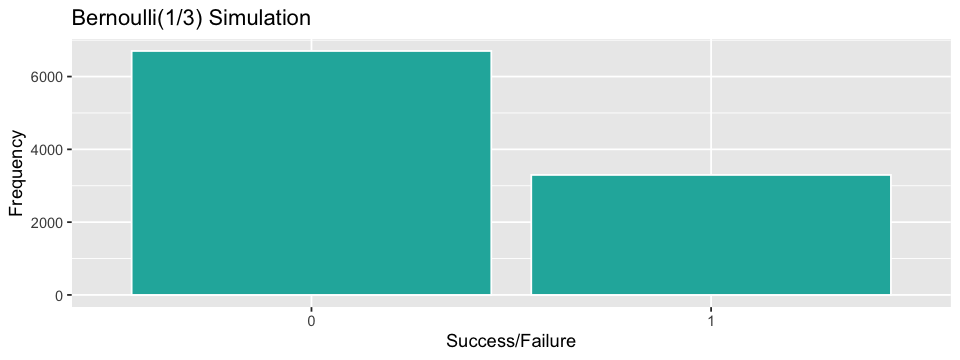

In [1]:
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=3)
a<-data.frame(rbinom(10000,1,(1/3)))
a[,1]<-as.character(a[,1])
colnames(a)<-'Sim'
ggplot(a,aes(x=Sim))+geom_bar(fill='lightseagreen',colour='white')+
labs(x='Success/Failure',y='Frequency')+ggtitle('Bernoulli(1/3) Simulation')

 As expected our simulation recorded roughly 2/3rds failures and 1/3rd succeses. Why? To explain this introduce the **probability mass function** (pmf). The pmf of a random variable (for example our X from before) is simply a function which states the probability with which each potential outcome occurs. As we only have two potential outcomes, 0 and 1, for the Bernoulli distribution there are only two potential probabilities we need to consider. pmf's are important because they give a complete description of how likely each outcome is to occur. Because the probablity of any event which is possible (so a 0 *or* a 1 for the Bernoulli distribution) must be 1, pmf's must sum to 1. In the case of our example our random variable X is distributed with the (pmf):

$ P(X) =
  \begin{cases}
    1/3       &   X  =1\\
    2/3  &   X  =0\\
    0 & \text{otherwise}
  \end{cases}
$

This is just an specific case of the Bernoulli distribution's pmf, which in general is:

$ P(X) =
  \begin{cases}
    p       &   X  =1\\
    1-p  &   X  =0\\
    0 & \text{o/w}
  \end{cases}
$



We say the **expected value** of a Bernoulli distributed random variable is just $p$. The expected value of a random variable is the same as its **population mean** or the share of the total outcomes which would be our outcome if we could conduct an extremely large number of trials. This is simple enough to see when we introduce the mathematical definition of expected value for discrete random variables as: $E(X)=\sum\limits_{i=1}^{n}p_ix_i$.   

So for a Bernoulli random variable X this is just $E(X)=p$, or $E(X)=1/3$ in the previous example. Clearly this fits with what our simulation showed us, as seen below:

If you're still not sure how we got here just remember that Bernoulli random variables can only be 1s or 0s. If there is a p (0≤p≤1) chance of them being 1s then we should expect their average to be p. So if p=0.2 our sample could look like:

In [2]:
x<-data.frame(rbinom(100,1,0.2))
colnames(x)<-'value'
x[,1]

[1] 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 [38] 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0
 [75] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In which the breakdown of 1s and 0s would be roughly

In [3]:
library(plyr)
print(count(x))

  value freq
1     0   81
2     1   19


Notice how we've been using `ggplot2`, dataframes and lots of other things we learned last week? Not everything will be explained explicitly from here out but anything which you haven't been introduced to will get a brief explanation. Hopefully all this seems a little fresher now.

### The Discrete Uniform Distribution  <a id='The Discrete Uniform Distribution'></a>
This is another relatively simple distribution which makes pretty good intuitive sense. The Discrete Uniform distribution describes a random variable which takes one of an finite number of values in a set, each with the exact same probability (hence the 'uniform'). When we say set we simply mean a collection of objects. We write them using braces (curly brackets) and by convention call them $S$ (for set!). For example $S=${1,2,3,4,5} is a set. A good intuitive example of a Discrete Uniform distributed random variable is the roll of a dice. While our Bernoulli dice example was contrained to either a 1 or 0, we can write the pmf of rolling a dice as:

$ P(X) =
  \begin{cases}
    1/6       &   X =  {1,2,3,4,5,6}\\
    0 & \text{o/w}
  \end{cases}
$

To decode, this means our dice roll takes any value in {1,2,3,4,5,6} with the same probability, 1/6. This generalises to: 

$ P(X) =
  \begin{cases}
    1/n       &   \forall X \in S \text{ where |S|=n}\\
    0 & \text{o/w}
  \end{cases}
$

Which means $X$ has a probability $1/n$ for all $X$ in the set $S$, where $S$ has size $n$.

Let's look at another simulation to get a sense of the Discrete Uniform distribution. This one involves the `sample` command, which just takes a random sample from the range specified. We set `replace=T` to indicate it is a sample with replacement. Once we understand this it will be much easier to take on the Continuous Uniform distriubtion. 

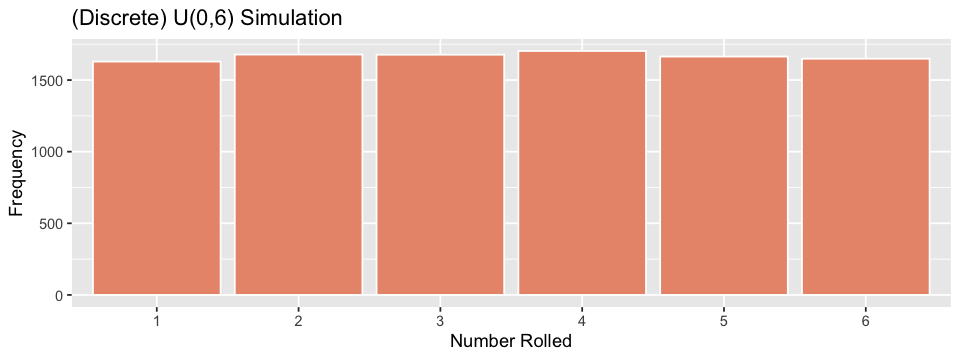

In [4]:
a<-data.frame(sample(1:6,10000,replace=T))
b<-data.frame(sample(1:6,10000,replace=T))
colnames(a)<-'Values'
colnames(b)<-'Values'
b[,1]<-as.character(a[,1])
ggplot(b,aes(x=Values))+geom_bar(fill='darksalmon',colour='white')+
labs(x='Number Rolled',y='Frequency')+ggtitle('(Discrete) U(0,6) Simulation')

Hopefully this seems intuitive. We rolled our fair (simulated) die 10,000 times and each number came up roughly 1/6th of the time. We should expect this.
We know from before that the expected value of X is $E(X)=\sum\limits_{i=1}^{n}p_ix_i$.

Using the distribution we introduced above ( $ P(X) =
  \begin{cases}
    1/6       &   X  ={1,2,3,4,5,6}\\
    0 & \text{o/w}
  \end{cases}
$ ) we can sub in the values of our example to find that: $E(X)=\sum\limits_{i=1}^{6}p_ix_i$=$\sum\limits_{i=1}^{6}\frac{1}{6}x_i=\frac{1}{6}\sum\limits_{i=1}^{6}x_i=\frac{1}{6}(1+2+3+4+5+6)=3.5$

Which fits pretty well with our observed value of $\bar{X}$, as seen below:




In [5]:
mean(a[,1])

[1] 3.5042

### The Continuous Uniform Distribution <a id='The Continuous Uniform Distribution'></a>
What makes this distribution a little harder is we don't have an easy intuitive understanding for Continuous Uniform distributed random variables. They don't exist in our daily lives in as obvious ways! The Continuous Uniform distribution describes a random variable which takes one of an infinite number of values between two real numbers (a and b). The name **continous** just comes from the fact a random variable with this distribution can take an infinite number of values. Don't be put off by infinity though, there are an infinte number of real numbers between 0 and 1!

Like we said, there is no good natural examples of this distribution. The closest we can come to a good (artificial) example of a Continuous Uniform distributed random variable is by imagining we want to pick a number between 0 and 1 absolutely at random. We could pick 0.01, 0.5, 0.93234324324 and any other number between 0 and 1 we wanted. To do this in a completely random way, we'd need the Continuous Uniform distribution. 

The obvious next step for us is to simulate a *Continuous* Uniform distribution, but before we do we need to think about one issue. In the Discrete Uniform distribution we had a finite set of $n$ values, or in the dice case, 6. Each of these has probability $1/n$. So the problem when we have infinite possible values is that the probability of any one value occuring is 0, as $\displaystyle{\lim_{n \to \infty}\tfrac{1}{n}}=0$. Obviously every possible outcome having an exactly 0 probability of occuring is not great news when we're trying to do statistics, so we need a new approach...

But first: a simulation. In this one we'll use the `runif(x,y,z)` command to generate a random sample of x observation from the continuous uniform distribution $U(y,z)$



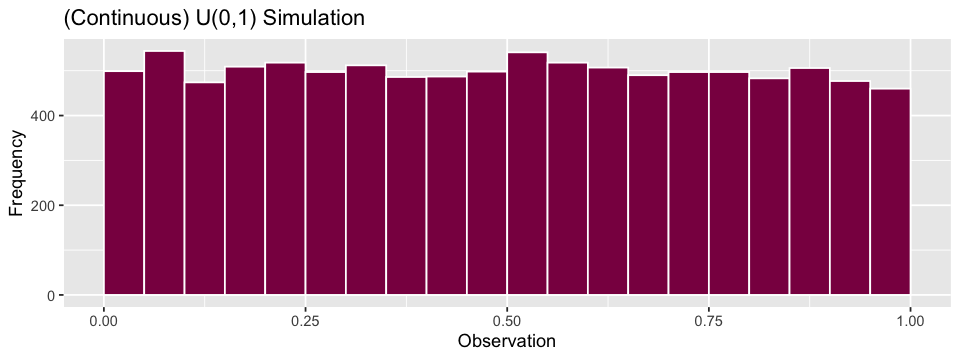

In [6]:
a<-data.frame(runif(10000,0,1))
colnames(a)<-'Values'
ggplot(a,aes(x=Values))+geom_histogram(fill='deeppink4',colour='white',breaks=0:20/20)+
labs(x='Observation',y='Frequency')+ggtitle('(Continuous) U(0,1) Simulation')


We simulated 10,000 draws from the $U(0,1)$ distribution and found that each bin of length 0.05 contained around 500 observations. This makes sense as the interval [0,1] has 20 of these bins (take [0.15,0.2] or [0.8,0.85] for example), so 10,000 observations from $U(0,1)$ should lead to about 10000/20=500 observations per bin! This is just like in our Discrete Uniform case except instead of the observations being integers they are any real number. For example a random sample of 10 points from our discrete distribution could look like:

In [7]:
sample(1:6,10,replace=T)

[1] 1 6 6 3 6 6 3 2 2 5

But from our Continuous Uniform example it could look like: 

In [8]:
runif(10,0,1)

[1] 0.05350849 0.46381705 0.11027413 0.35282115 0.65401880 0.19490257
 [7] 0.56950080 0.15431658 0.85502773 0.03914429

The last thing for us to cover before moving on is the expected value of a $U(a,b)$ distributed random variable $X$, or $E(X)$. In the discrete case we calculated expected value using $E(X)=\sum\limits_{i=1}^{n}p_ix_i$, but as mentioned $p_i=0$ for every i in our distribution and there are infinite i's! This points us in a calculus direction. For continuous random variables we calculate expected value using $E(X)=\int\limits_{-\infty}^{\infty} xf(x)  \mathrm{d}x$, where $f(x)$ is the pdf of $X$. 

We already know the pdf of the $U(a,b)$ distribution is $ f(x) =
  \begin{cases}
    \frac{1}{b-a}       &   \text{for } x \in [a,b] \\
    0 & \text{o/w}
  \end{cases}
$, so our expected value is simply $E(X)=\int\limits_{-\infty}^{a} 0    \mathrm{d}x+\int\limits_{a}^{b} x\frac{1}{b-a}    \mathrm{d}x+\int\limits_{b}^{\infty} 0    \mathrm{d}x=\frac{b^2-a^2}{2(b-a)}=\frac{a+b}{2}$

So for our random number between 0 and 1 example, we would expect to choose 0.5 because that's exactly in the centre of our distribution! But of course we wouldn't be complete without a simulation:

In [9]:
mean(a[,1])

[1] 0.495124

So over 10,000 samples we get a mean pretty close to 0.5.

### The Binomial Distribution  <a id='The Binomial Distribution'></a>
The Binomial distribution is fundamental in statistics as it describes the probability of a sum of Bernoulli events (like a coin toss) occuring a given number of times. It is a discrete distribution, because obviously there are a finite number of possible sums of Bernoulli random variables. In fact in a sense we can say that we have already covered the Binomial distribution, because the Bernoulli distribution is just the Binomial distribution when n=1. This is why one of our first commands was `rbinom(10000,1,1/3)`, because we were generating Binomial trials where 1 Bernoulli event occured. A good example of when we can use the Binomial distribution is to find the probability of a fair coin showing heads 7 times in 10 flips. To do this we use `dbinom()` to find the probability of a specific event occuring. In R this is simply:

In [10]:
dbinom(7,10,0.5)

[1] 0.1171875

Which is the equivalent of: $P(X=7)   = {10 \choose 7} 0.5^7 (1-0.5)^{ 3}$ 

Likewise we could have found the probability of our fair coin showing heads **at least** 7 times out of 10 with `pbinom()`, or:


In [11]:
pbinom(7,10,0.5)

[1] 0.9453125

Which is the equivalent of: $P(X≥7)   = {10 \choose 7} 0.5^7 (1-0.5)^{ 3}$


The Binomial distribution $B(n,k)$ observes the probability distribution function: 
$P(X=k)=\begin{cases}
{n\choose k}  p^k (1-p)^{n-k} & k\in [0,n]\\ 
 0  &  \text{ o/w} 
\end{cases}$

Where $\binom{n}{k} = \frac{n!}{k!(n-k)!} $

We see this more clearly by plotting the distribution for several different parameters, which requires us to install the `gridExtra` package and to import the `RColorBrewer` package:

In [12]:
install.packages('gridExtra')
library(gridExtra)
library(RColorBrewer)


The downloaded binary packages are in
	/var/folders/45/1l28_wqj4m7gwjtnrw1k7mgr0000gn/T//RtmpOlaquG/downloaded_packages


We also will use our first `for loop` in graphing. The `paste0` command simply pastes two things together and the `assign` command is the `for loop` equivalent of setting `a<-b`. The last new command is `grid.arrange()` which simply plots multiple plots in an array.

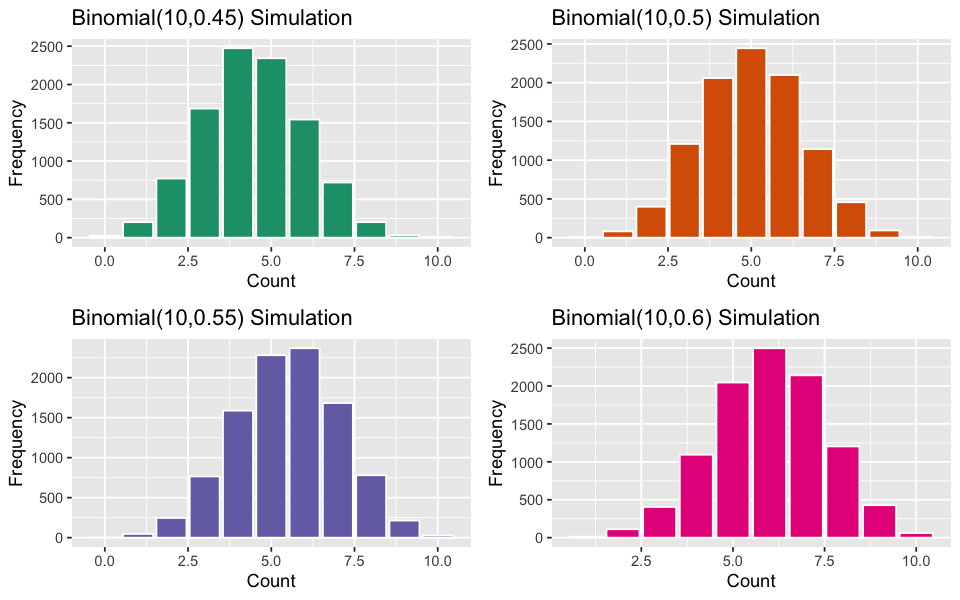

In [56]:
options(repr.plot.width=8, repr.plot.height=5)
for (i in 1:4) {
  assign(paste0("x", i), data.frame(rbinom(10000,10,0.4+i/20)))
   d=get(paste0("x", i))  
    colnames(d)='Values'
     assign(paste0("x", i),d)
    assign(paste0("y", i),ggplot(d,aes(x=Values))+geom_bar(fill=brewer.pal(n = 7, name = "Dark2")[i],colour='white')+labs(x='Count',y='Frequency')
           +ggtitle(paste0('Binomial(10,',0.4+i/20,') Simulation')))
}
grid.arrange(y1,y2,y3,y4,ncol=2)



What we are seeing graphically is 10,000 simulations of a Binomial trial, using 4 different probabilities. Evidently the **mean** of the distributions increase as we increase the probability of successs (0.45, 0.5, 0.55, 0.6) but the **variance** of the distributions stays (almost exactly) the same. We'll get a better sense of this 'variance' question when we cover the Normal distribution in the next section.


Another key question we need to answer for the Binomial distribution is what is its expected value. The simple answer is just for $X \sim B(n,p)$, $E(X)=np$. How did we get this result? Well we can think about integrating over our probability distribution like before, so: $E(X)=\sum\limits_{k=0}^{n} k{n\choose k}  p^k (1-p)^{n-k}$

For our coin toss example this is $E(X)=\sum\limits_{k=0}^{10} k{10\choose k}  (0.5)^k (1-0.5)^{10-k}=10(0.5)=5$. Let's check this with a simulation:


In [14]:
mean(rbinom(10000,10,0.5))

[1] 4.9965

So in 10,000 simulations of 10 coin tosses the average number of heads was almost exactly 5.

### The Normal Distribution <a id='The Normal Distribution'></a>

At last we have reached the Normal distribution! Before we get into the Normal distribution just a brief heads up that this is *by far* the most important distribution we will cover. But of course we already know that from first year (or at least we should!!). The Normal Distribution is continuous distribution which is symmetric and bell-shaped, meaning that the bulk of the observations occur around the mean and become less likely at the same rate as they get further from it in both directions (smaller and larger than average). An extremely intuitive example is height. Let's not get too scientific but the average height for a British (adult) woman is around 161cm (5'3"). The Normal Distribution means that the proportion of British women who are at least 20cm taller than this, so taller than 176cm (5'9"), is around the same proportion who are at least 20cm shorter than this, or under 146cm (4'9"). We conduct a simulation to make more sense of this:

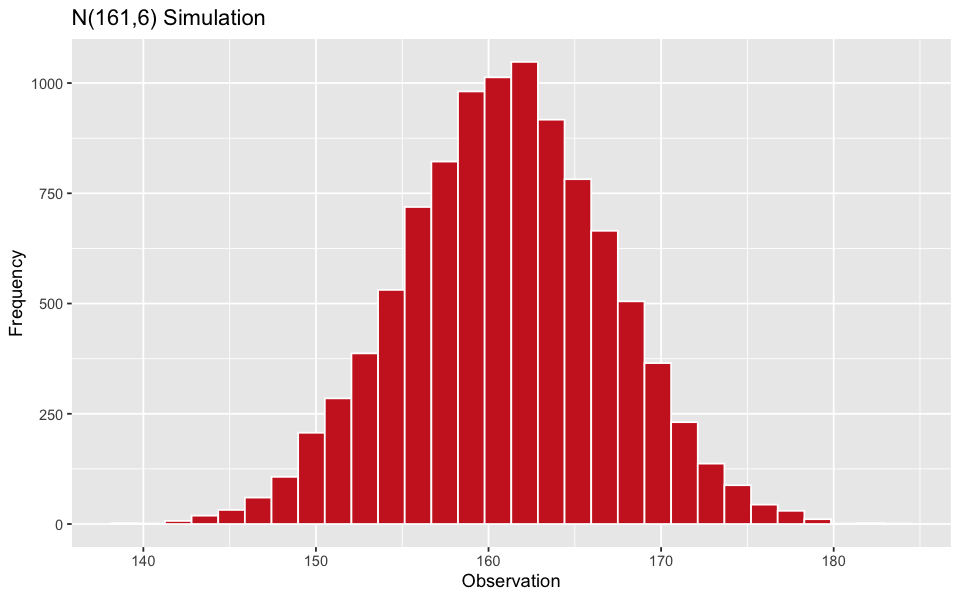

In [15]:
a<-data.frame(rnorm(10000,161,6))
colnames(a)<-'Values'
ggplot(a,aes(x=Values))+geom_histogram(fill='firebrick3',colour='white',bins=30)+
labs(x='Observation',y='Frequency')+ggtitle('N(161,6) Simulation')



In our simulation of the heights of 10,000 British women we see that only a small proportion of the population is taller than 176cm or shorter than 146cm. The vast majority fall within the range of around 150-170cm. 

Before we can say more about the normal distribution we need to introduce a concept which has been notably absent so far, **standard deviation**. Obviously you've covered standard deviation before but if you can't instantly explain what it means in general terms then we recommend not skipping ahead just yet. A data's standard deviation is a measure of the average difference between observations and their mean. Mathematically we calculate standard as expected but with a little twist. Instead of simply taking the average of the difference between each observation and the mean we find the average of the *squares* of these distances, then find the square root of that, so: $sd(X)=\sqrt{\sum\limits_{i=1}^{n}(X_i-\mu)^2}$


What's the point of the square and the square root? Well that requires us to think about **variance** or standard deviation squared. The reason we square each value for our variance is so that our negative values and positive ones don't cancel out and leave us with 0. It's easy to see that $\sum\limits_{i=1}^{n}(X_i-\mu)=\sum\limits_{i=1}^{n}X_i-\sum\limits_{i=1}^{n}\mu=\sum\limits_{i=1}^{n}X_i-n\mu=\sum\limits_{i=1}^{n}X_i-n\frac{1}{n}\sum\limits_{i=1}^{n}X_i=0$

Squaring each difference solves this problem and the average of these squares gives us variance. In a really simple sense, it's how much values vary! Standard deviation is used because the squaring also squares the units, so we'd meassure the variance of a company's net income in $£^2$, which isn't very helpful. So standard deviation is the square root of variance to get us back to £. Let's see how variance/standard deviation affect our normal distributions by extending our height example.

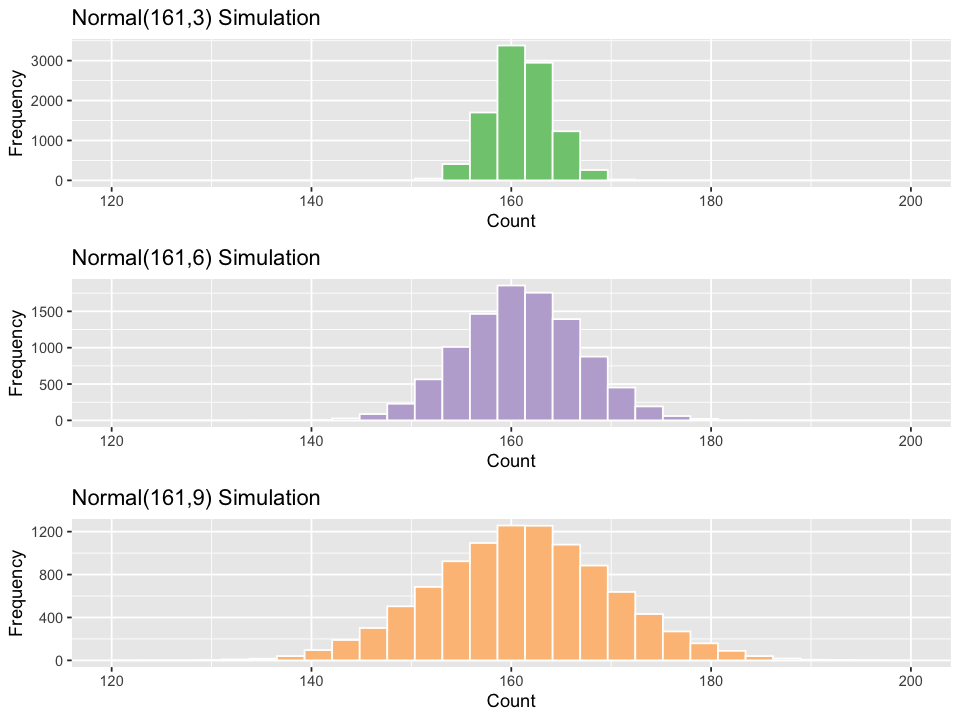

In [55]:
options(repr.plot.width=8, repr.plot.height=6)
for (i in 1:3) {
  assign(paste0("x", i), data.frame(rnorm(10000,161,3*i)))
   d=get(paste0("x", i))  
    colnames(d)='Values'
     assign(paste0("x", i),d)
    assign(paste0("y", i),ggplot(d,aes(x=Values))+geom_histogram(fill=brewer.pal(n = 7, name = "Accent")[i],colour='white',bins=30)+labs(x='Count',y='Frequency')
           +ggtitle(paste0('Normal(161,',i*3,') Simulation'))+xlim(120,200))
}
grid.arrange(y1,y2,y3,ncol=1)




As we can see our distributions have spread out a lot as standard deviation increased from 3 to 6 and then to 9. A reasonable proportion of women are between 140-145cm in our high variance (final) histogram, a tiny fraction are in our middle (true population) histogram and exactly 0 are in our top one. 

Remember that because variance is the average of squared deviations from the mean it can also be written as $Var(X)=E((X-E(X))^2)=E(X^2)-E(X)^2$, which uses the **second population moment**. We have already seen the **first population moment**, $E(X)=\int\limits_{-\infty}^{\infty} xf(x)    \mathrm{d}x$, quite a lot, so it shouldn't be too surprising to see $E(X^2)=\int\limits_{-\infty}^{\infty} x^2f(x)    \mathrm{d}x$.

The standard deviation and variance are vital concepts because they form one of the two key variables in a Normal distribution; along with the mean. When we say a variable $X$ is normally distributed, we describe the particular normal distribution it follows as $X \sim N(\mu,\sigma^2)$, where $\mu$ is the population mean (161cm in our height example) and $\sigma$ is our standard deviation (which we graphed as 3,6 and 9cm above). Including the standard deviation is crucial because, as we have seen above, random variables which are normally distributed with the same mean *don't* have to follow the same distribution. But you knew that already, didn't you.

In a sense this is quite a strange way to think about our distribution, because we have already been given the population mean $\mu$! In all our other examples we have had to derive it using $E(X)$. What may be even stranger is that we actually need the population mean and the population variance ($\sigma^2$) to construct the pdf, which is: $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{-(x-\mu)^2}{2\sigma^2}$. This formula probably looks pretty scary right now but don't worry we aren't going to use it in this notebook. It's just included for illustration. 

There is a LOT more we could say about the Normal distribution, importantly how it relates to the other distributions we have already covered, but we leave that for Important Distributions II.


### The Chi-Squared Distribution <a id='The Bernoulli Distribution'></a>

The Chi-squared distribution is a direct product of the Normal distribution, just like the Binomial distribution is a direct product of the Bernoulli distribution. An extremely important special case of the Normal distribution is the Standard Normal distribution, or $N(0,1)$, which we graph below. When a random variable, say X, is distributed around $N(0,1)$, then $X^2$ is distributed around the Chi-squared distribution $\chi_1^2$. The subscript 1 denotes 1 **degree of freedom**, or the fact that there is 1 (squared) random variable. When two random variables, say X and Y are distributed around $N(0,1)$, then $X^2+Y^2$ is distributed around the Chi-squared distribution $\chi_2^2$, and for $X_i \sim N(0,1)$ $\forall i$, $\sum\limits_{i=1}^{n}X_i^2 \sim \chi^2_n$.

In this plot we introduce `stat_function`

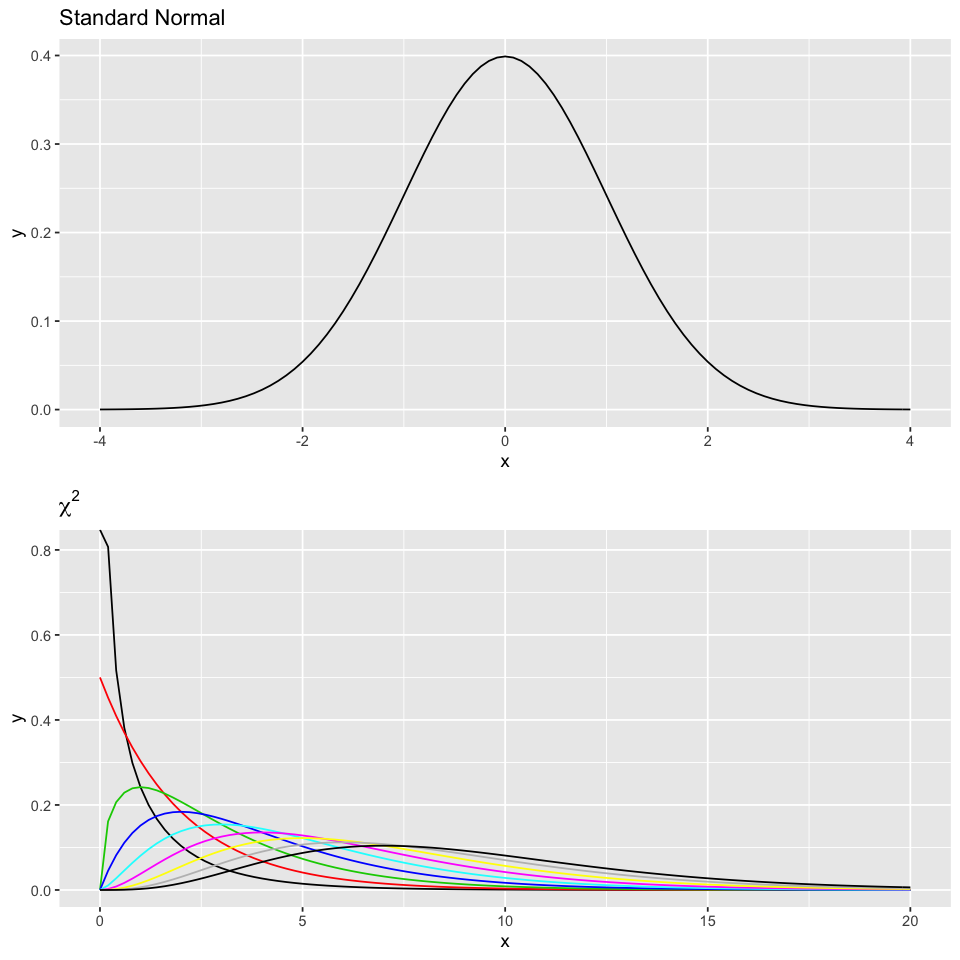

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
a<-ggplot(data.frame(x=c(-4,4)),aes(x=x))+stat_function(fun=dnorm)+ggtitle('Standard Normal')
d<-ggplot(data.frame(x=c(-4,4)),aes(x=x))+xlim(0,20)+ggtitle(expression(chi^2))
l<-list()
for (i in 1:9) {l<-c(l,stat_function(fun=dchisq,args=list(df=i),colour=i))}
c<-d+l
grid.arrange(a,c,ncol=1)

We don't usually use the Chi-squared distribution much on its own, but it is an essential component of the following two distributions: the t-distribution and the F-distribution. So some colourful lines will suffice for our purposes. 

### The t-distribution <a id='The t-distribution'></a>

The t-distribution is essential in econometrics, as you either know very well or are about to find out. It is used for conducting **hypothesis testing**, like whether our regression coefficients are actually meaningful or whether they're likely to show up through random chance. The t-distribution is very very similar to the Standard Normal distribution. It is symmetric, bell-shaped and continous, but has one key difference: **fatter tails**. You've heard this before for certain but what does it actually mean? Fat tails simply mean that outliers are more common than in the Standard Normal distribution, or that there is more area in the 'tails' of the distribution on either side of the mean. This is useful when we are dealing with more uncertainty (real-world data is not that friendly) and we want to be a little more hesitant before saying "There's no way that could have happened through chance alone".

A random variable $Z$ follows the t-distribution $t_n$ if it can be written as $Z=\dfrac{X}{\sqrt{\dfrac{Y}{n}}}$ where $X \sim N(0,1)$ and $Y \sim \chi_n^2$. 

This probably all sounds really technical and irrelevant, especially considering all the useful examples we had before, but it turns out when we do regressions in econometrics that a lot of our coefficients will follow the t-distribution.

The last thing to note is that as the degrees of freedom of the t-distribution, which is just the degrees of freedom of the Chi-squared it is made up of, increases, the t-distribution approaches the Standard Normal distribution. So a $t_{100}$ distribution is essentially the same as a Standard Normal distribution - it loses its fat tails! We see this below:  

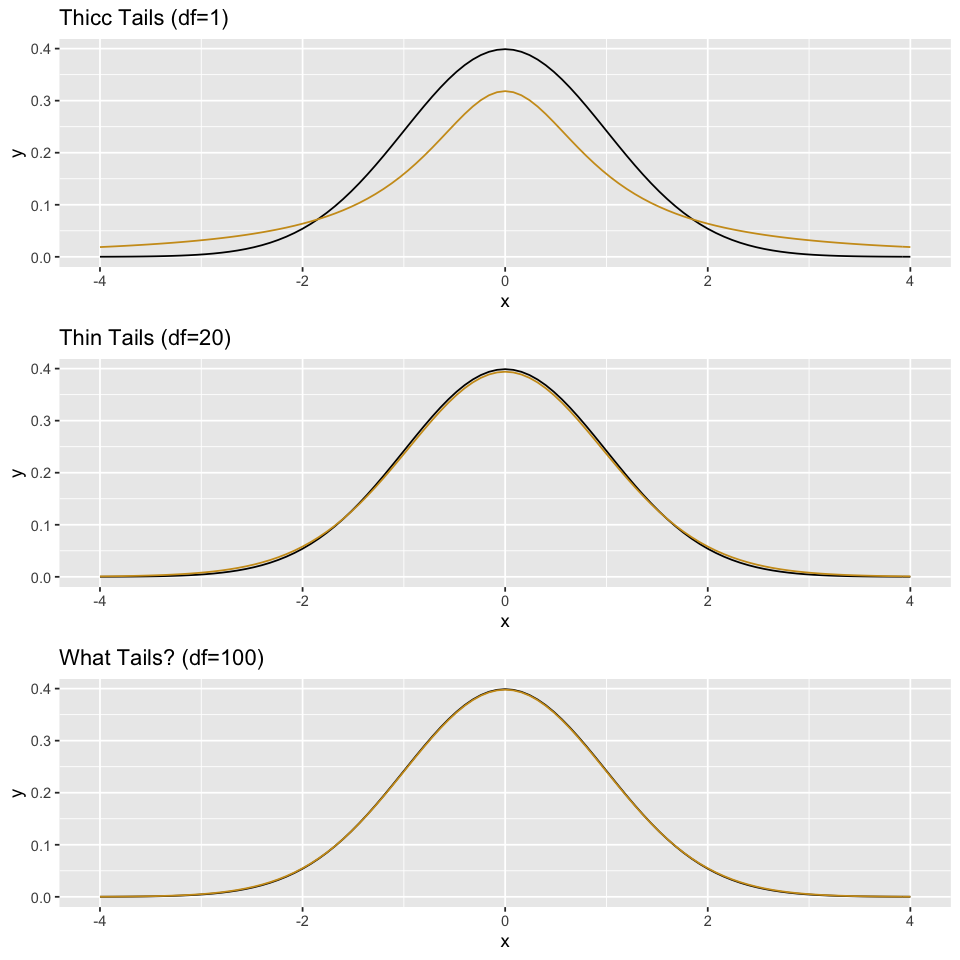

In [18]:
options(repr.plot.width=8, repr.plot.height=8)
a<-ggplot(data.frame(x=c(-4,4)),aes(x=x))+stat_function(fun=dnorm)+stat_function(fun=dt,args=list(df=1),colour='goldenrod3')+ggtitle('Thicc Tails (df=1)')
b<-ggplot(data.frame(x=c(-4,4)),aes(x=x))+stat_function(fun=dnorm)+stat_function(fun=dt,args=list(df=20),colour='goldenrod3')+ggtitle('Thin Tails (df=20)')
c<-ggplot(data.frame(x=c(-4,4)),aes(x=x))+stat_function(fun=dnorm)+stat_function(fun=dt,args=list(df=100),colour='goldenrod3')+ggtitle('What Tails? (df=100)')
grid.arrange(a,b,c,ncol=1)

### The F-distribution <a id='The f-distribution'></a>

The F-distribution is other main distribution based on the Chi-squared distribution. A random variable $Z$ is distributed around the F-distribution $F_{n,m}$ if $Z=\dfrac{X/n}{Y/m}$ where $X \sim \chi_n^2$ and $Y \sim \chi_m^2$. It's not a symmetric distribution as we can see by plotting some more colourful lines: 

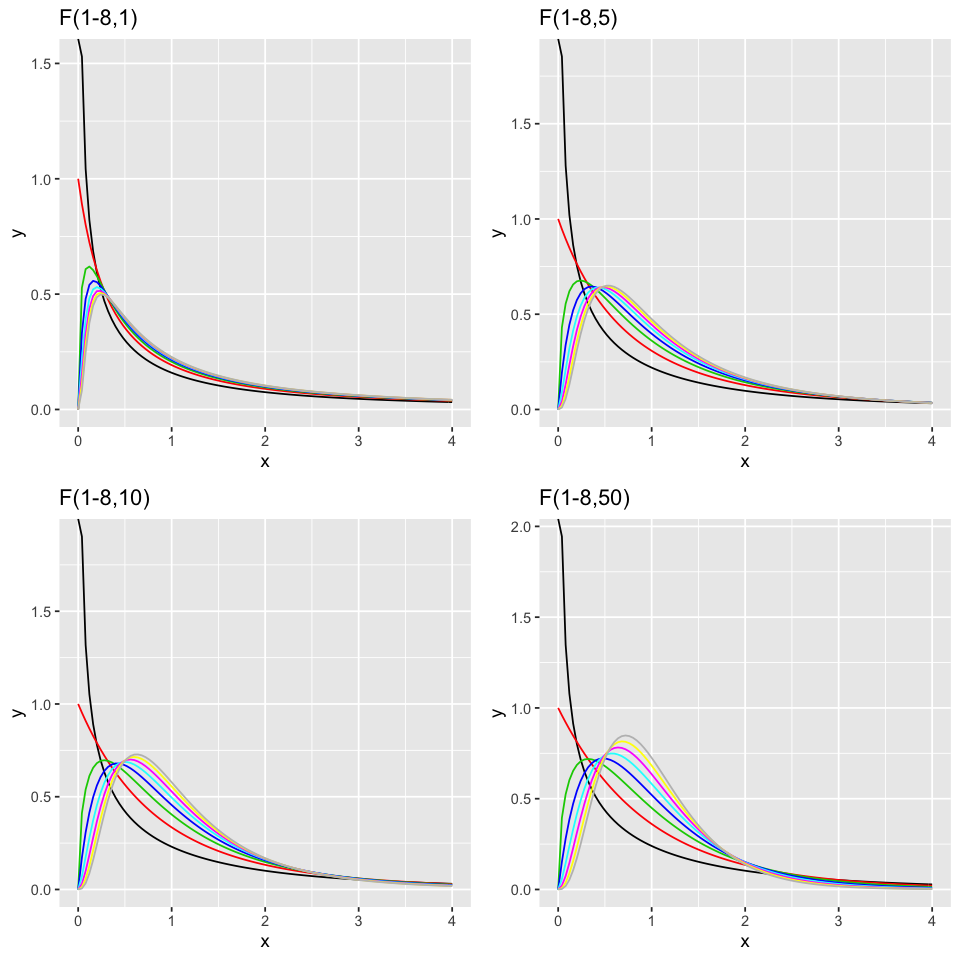

In [58]:
options(repr.plot.width=8, repr.plot.height=8)
a<-ggplot(data.frame(x=c(0,4)),aes(x=x))
k<-list()
for (i in 1:8) {k<-c(k,stat_function(fun=df,args=list(df1=i,df2=1),color=i))}
l<-list()
for (i in 1:8) {l<-c(l,stat_function(fun=df,args=list(df1=i,df2=5),color=i))}
m<-list()
for (i in 1:8) {m<-c(m,stat_function(fun=df,args=list(df1=i,df2=10),color=i))}
n<-list()
for (i in 1:8) {n<-c(n,stat_function(fun=df,args=list(df1=i,df2=50),color=i))}
grid.arrange(a+k+ggtitle('F(1-8,1)'),a+l+ggtitle('F(1-8,5)'),a+m+ggtitle('F(1-8,10)'),a+n+ggtitle('F(1-8,50)'),ncol=2)                                                              







Once again the F-distribution seems extremely tedious and useless (as it probably did when you first learned it) but some very key estimators in econometrics are distributed around it, so it's essential to know get a solid grip on before we start with metrics in Econometrics I.

### The Poisson Distribution <a id='The Poisson Distribution'></a>

With the Poisson distribution we are out of the woods in the sense that we are back dealing with intuitive examples for a distribution which we have pretty nice formulas for. The Poisson distribution describes the number of occurences which happen at even intervals in a given unit of time. For example if you sat by the road and counted the number of yellow cars which passed you every hour (an important statistic for wherever 'spotto' is played), and you found on average 5 cars passed per hour, then the $Poisson(10)$ distribution would be able to tell you the likelihood that 10 yellow cars pass you in the next hour, or 100, or 1 in the next minute. The crucial thing we need to keep in mind is that these events must be *independent*, so one happening doesn't change the chance of another happening, and occur at a constant rate. If yellow cars like to follow each other then independence wouldn't hold anymore and so our Poisson distribution wouldn't apply. And if there are times when yellow cars are more likely to be on the road then this could affect our constant rate assumption and mess up our Poisson distribution too.

Let's simulate our cars example.

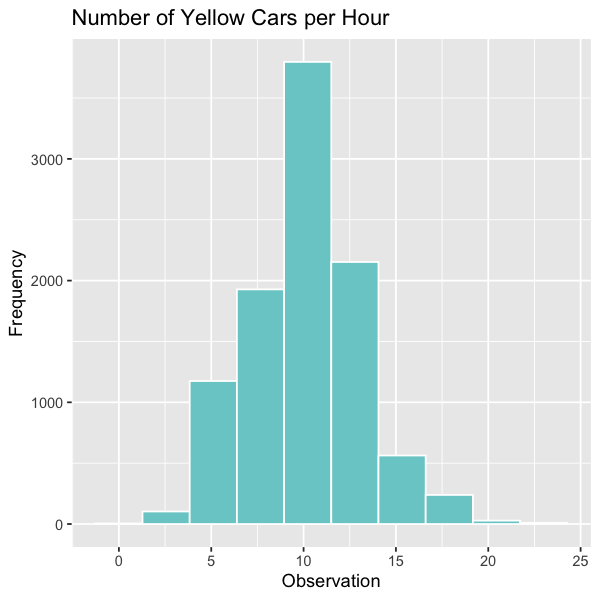

In [61]:
options(repr.plot.width=5, repr.plot.height=5)
a<-data.frame(rpois(10000,10))
colnames(a)<-'Values'
ggplot(a,aes(x=Values))+geom_histogram(fill='darkslategray3',colour='white',bins=10)+
labs(x='Observation',y='Frequency')+ggtitle('Number of Yellow Cars per Hour')

In this example we sat by the highway for 416.66 days, or 10,000 hours (so we're officially experts!), and counted the numbers of yellow cars passing per hour. Clearly some hours there weren't any, and some hours there were more than 20. In fact we see that:

In [44]:
max(a)

[1] 24

Which is clearly a lot of yellow cars considering our average is 10, but also not that many in a way; especially considering 100 yellow cars in an hour seemed plausible 5 minutes ago. But as usual we would have known this is we had an understanding of the pmf of the $Poisson(\lambda)$ distribution:


 $ \begin{cases}
    \dfrac{\lambda^ke^{-\lambda}}{k!}       &   \text{for } k=0,1,2,... \\
    0 & \text{o/w}
  \end{cases}$
  
  so for the $Poisson(10)$: 
  
   $ \begin{cases}
    \dfrac{10^ke^{-10}}{k!}       &   \text{for } k=0,1,2,... \\
    0 & \text{o/w}
  \end{cases}$
  
  If we knew this beforehand then we could quickly see that $P(X=100)= \dfrac{10^{100}e^{-10}}{100!}$, and

In [45]:
10^100*exp(-10)/factorial(100)

[1] 4.864649e-63

Which is basically 0. So what would our expected value be for the $Poisson(\lambda)$ distribution? It's just $\lambda$! And the variance? $\lambda$ again! We don't prove these properties but we can easily see what they were in our simulation:

In [59]:
mean(b)
var(b)

[1] 5.945956

[1] 35.14119

Esssentially spot on. Ok, only one more distribution to go now!

### The Exponential Distribution <a id='The Exponential Distribution'></a>

Hopefully you'll remember the Exponential distribution is the continuous cousin of the Poisson distribution. Where the Poisson distribution tells us the number of events per unit of time, the Exponential distribution tells us the amount of time between events. The same rules of independence and a constant rate still apply, but the good news is our previous example does too!

We simulate the amount of time it takes to wait for 10,000 yellow cars, each still showing up on average 10 times per hour.

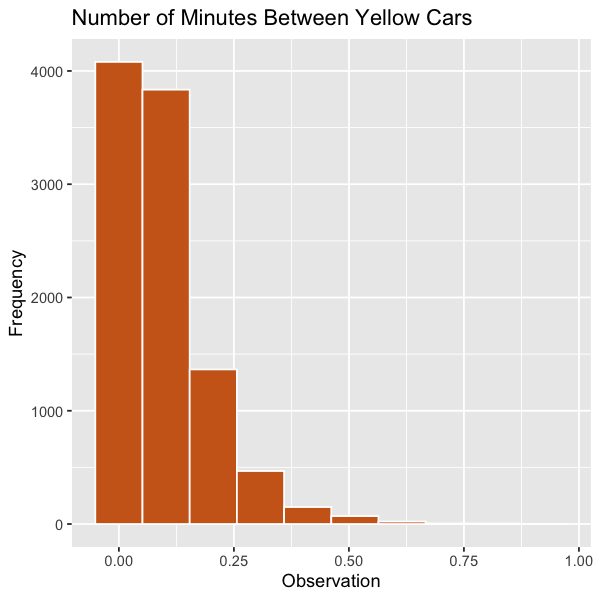

In [60]:
options(repr.plot.width=5, repr.plot.height=5)
a<-data.frame(rexp(10000,10))
colnames(a)<-'Values'
ggplot(a,aes(x=Values))+geom_histogram(fill='chocolate3',colour='white',bins=10)+
labs(x='Observation',y='Frequency')+ggtitle('Number of Minutes Between Yellow Cars')

I'm sure most of you who've gotten this far have a pretty good idea of what $E(X)$ should be when $X \sim exp(\lambda)$. 10 cars hour, so 6 minutes per car right? 

In [53]:
mean(b)

[1] 5.945956

Right.

So $E(X)=\frac{1}{\lambda}$

This is also not too hard to see when we consider $f(x,\lambda)= 
\begin{cases}
    \lambda e^{-\lambda x}       &   \text{for } x≥0 \\
    0 & \text{o/w}
  \end{cases}$ but we do need a bit of integration by parts which can be a hassle.
  
 More integration by parts and we see $Var(X)=\frac{1}{\lambda^2}$

In [54]:
var(b)

[1] 35.14119

And there we have it! A brief and hopefully not too painful overview of how R can help us get a way better intuitive grip of the key statistical distributions. In the next session we'll cover Linear Algebra and how to use R for matrix algebra (warning: Eigenvalues). After that we'll return to stats in Statistics II to get a better grip of how some of these concepts fit together. Once that's all sorted we'll be well and truly ready to start our first 'real' topic: linear regression!